In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
# đọc dữ liệu và xem dữ liệu
df = pd.read_csv('hotel_bookings.csv',sep=',')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


###XU LY DU LIEU

- Bộ dữ liệu có 119390 bản ghi và 32 thuộc tính

In [4]:
df.shape

(119390, 32)

In [5]:
#Function in giá trị duy nhất của mỗi cột trong df(dataframe)
def printUniqueValue(df):
    for i in df.columns:
        print("Number of unique values in", i, "is", df[i].nunique())

printUniqueValue(df)

Number of unique values in hotel is 2
Number of unique values in is_canceled is 2
Number of unique values in lead_time is 479
Number of unique values in arrival_date_year is 3
Number of unique values in arrival_date_month is 12
Number of unique values in arrival_date_week_number is 53
Number of unique values in arrival_date_day_of_month is 31
Number of unique values in stays_in_weekend_nights is 17
Number of unique values in stays_in_week_nights is 35
Number of unique values in adults is 14
Number of unique values in children is 5
Number of unique values in babies is 5
Number of unique values in meal is 5
Number of unique values in country is 177
Number of unique values in market_segment is 8
Number of unique values in distribution_channel is 5
Number of unique values in is_repeated_guest is 2
Number of unique values in previous_cancellations is 15
Number of unique values in previous_bookings_not_canceled is 73
Number of unique values in reserved_room_type is 10
Number of unique values

- Tìm các cột có giá trị bị thiếu và tính phần trăm

In [6]:
# Tìm số giá trị còn thiếu trong mỗi cột
missing_values = df.isnull().sum()

#Tính tỷ lệ các giá trị bị thiếu trong mỗi cột dưới dạng phần trăm
missing_ratio = (missing_values / len(df)) * 100

# Kết hợp các kết quả vào một DataFrame duy nhất để dễ đọc hơn
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Ratio (%)': missing_ratio
})

# In tóm tắt
missing_data_summary


,Missing Values,Missing Ratio (%)
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


- Thay thế giá trị hợp lý của các cột giá trị có ít giá trị bị thiếu
- Lọc ra cột có children, adult, babies = 0
- Xóa cột "company" có 94% giá trị bị thiếu

In [7]:
replace_null_value = {"children": 0.0, "country": "Unknown", "agent": 0}
df = df.fillna(replace_null_value)
df.drop('company', axis=1, inplace=True)
df['meal']= df['meal'].replace('Undefined', 'SC')
df = df[df['market_segment'] != 'Undefined']

filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df = df[~filter]

- Kiểm tra xem có bao nhiêu bản ghi đã bị loại bỏ và tỷ lệ dữ liệu bị loại bỏ

In [8]:
df.shape
dropped_percentage = 100 - (df.shape[0] / 119390 * 100)
print("Size of data:", df.shape, "Percentage of data dropped:", dropped_percentage, '%')

Size of data: (119208, 31) Percentage of data dropped: 0.15244157802160885 %


#### Lựa chọn tính năng sử dụng ma trận tương quan

Xác định hàm để mã hóa dữ liệu phân loại

In [9]:
def encode_cat(df, cat_features):
    encoders = {}
    for feature in cat_features:
        encoder = LabelEncoder()
        df[feature] = encoder.fit_transform(df[feature])
        encoders[feature] = encoder
    return encoders

def inverse_encode_cat(df, encoders):
    for feature, encoder in encoders.items():
        df[feature] = encoder.inverse_transform(df[feature])

In [10]:
cat_features = ['hotel', 'arrival_date_month','meal',
                'country','market_segment','distribution_channel', 
                'reserved_room_type', 
                'assigned_room_type','deposit_type', 
                'customer_type','reservation_status',
                ]
encoders = encode_cat(df, cat_features)

### 1. Đặc điểm phân loại

In [11]:
df_cat = df[cat_features + ['is_canceled']]
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119208 entries, 0 to 119389
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   hotel                 119208 non-null  int64
 1   arrival_date_month    119208 non-null  int64
 2   meal                  119208 non-null  int64
 3   country               119208 non-null  int64
 4   market_segment        119208 non-null  int64
 5   distribution_channel  119208 non-null  int64
 6   reserved_room_type    119208 non-null  int64
 7   assigned_room_type    119208 non-null  int64
 8   deposit_type          119208 non-null  int64
 9   customer_type         119208 non-null  int64
 10  reservation_status    119208 non-null  int64
 11  is_canceled           119208 non-null  int64
dtypes: int64(12)
memory usage: 11.8 MB


Vẽ ma trận tương quan giữa các đặc điểm phân loại và mục tiêu

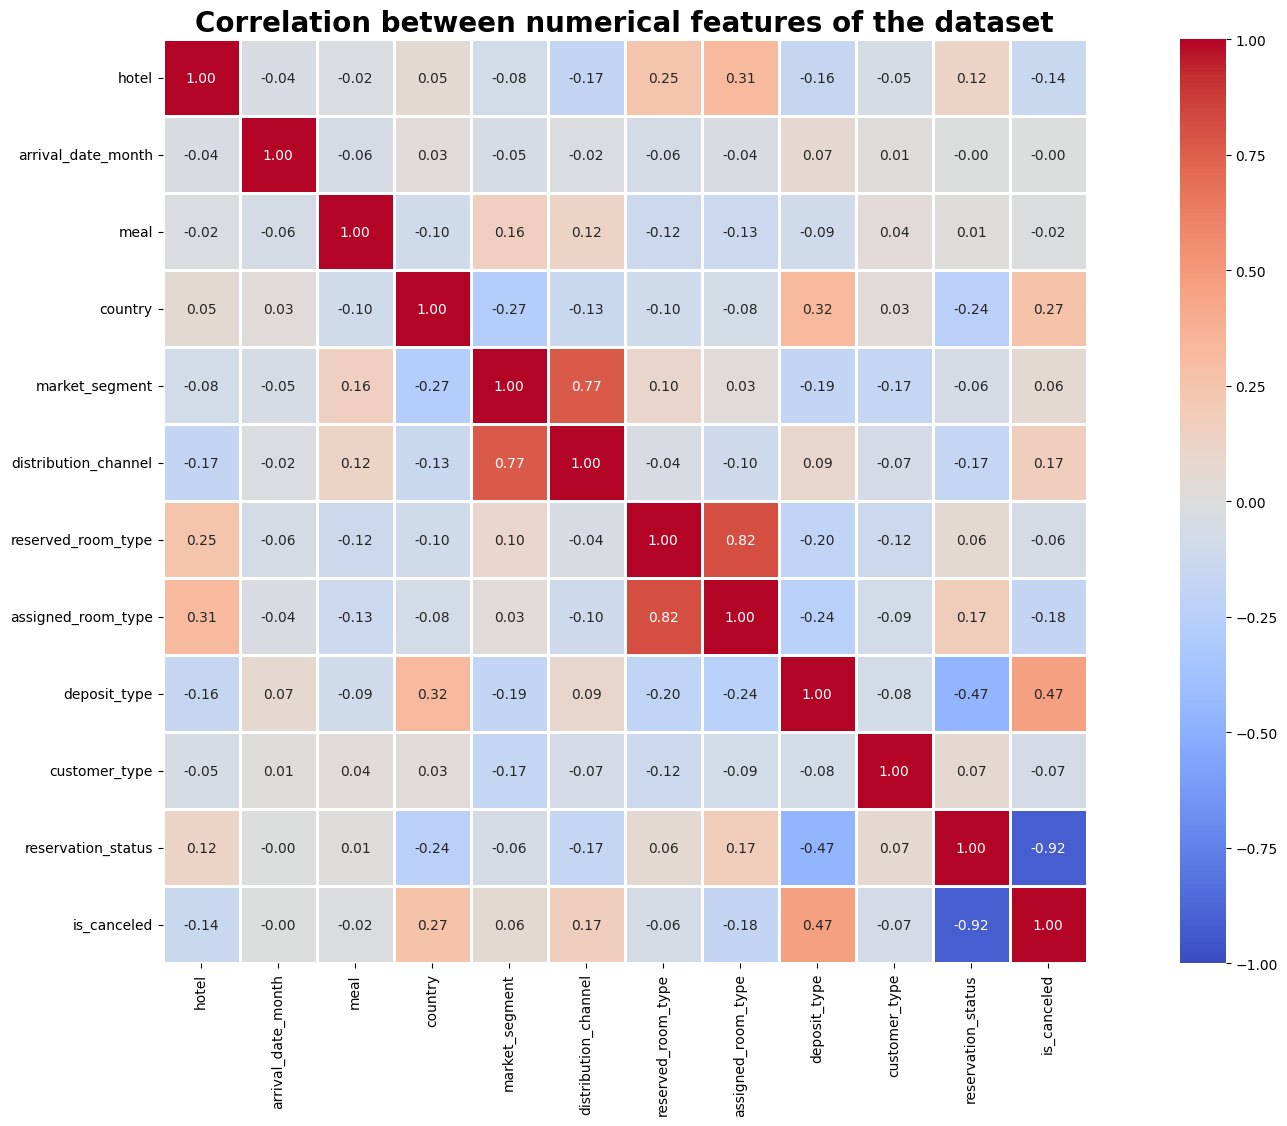

In [12]:
cat_corr = df_cat.corr()

plt.figure(figsize=(24, 12))
sns.heatmap(cat_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", center= 0,
            square=True, linewidths=2)
plt.title('Correlation between numerical features of the dataset', fontsize=20, fontweight='bold')
plt.show()

### 2. Các tính năng số

In [13]:
selected_columns = [col for col in df.columns if col not in cat_features + ['reservation_status_date']]
df_num = df[selected_columns]

# Hiển thị thông tin của DataFrame kết quả
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119208 entries, 0 to 119389
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119208 non-null  int64  
 1   lead_time                       119208 non-null  int64  
 2   arrival_date_year               119208 non-null  int64  
 3   arrival_date_week_number        119208 non-null  int64  
 4   arrival_date_day_of_month       119208 non-null  int64  
 5   stays_in_weekend_nights         119208 non-null  int64  
 6   stays_in_week_nights            119208 non-null  int64  
 7   adults                          119208 non-null  int64  
 8   children                        119208 non-null  float64
 9   babies                          119208 non-null  int64  
 10  is_repeated_guest               119208 non-null  int64  
 11  previous_cancellations          119208 non-null  int64  
 12  previous_bookings_not

Vẽ ma trận tương quan giữa các đặc điểm số và mục tiêu

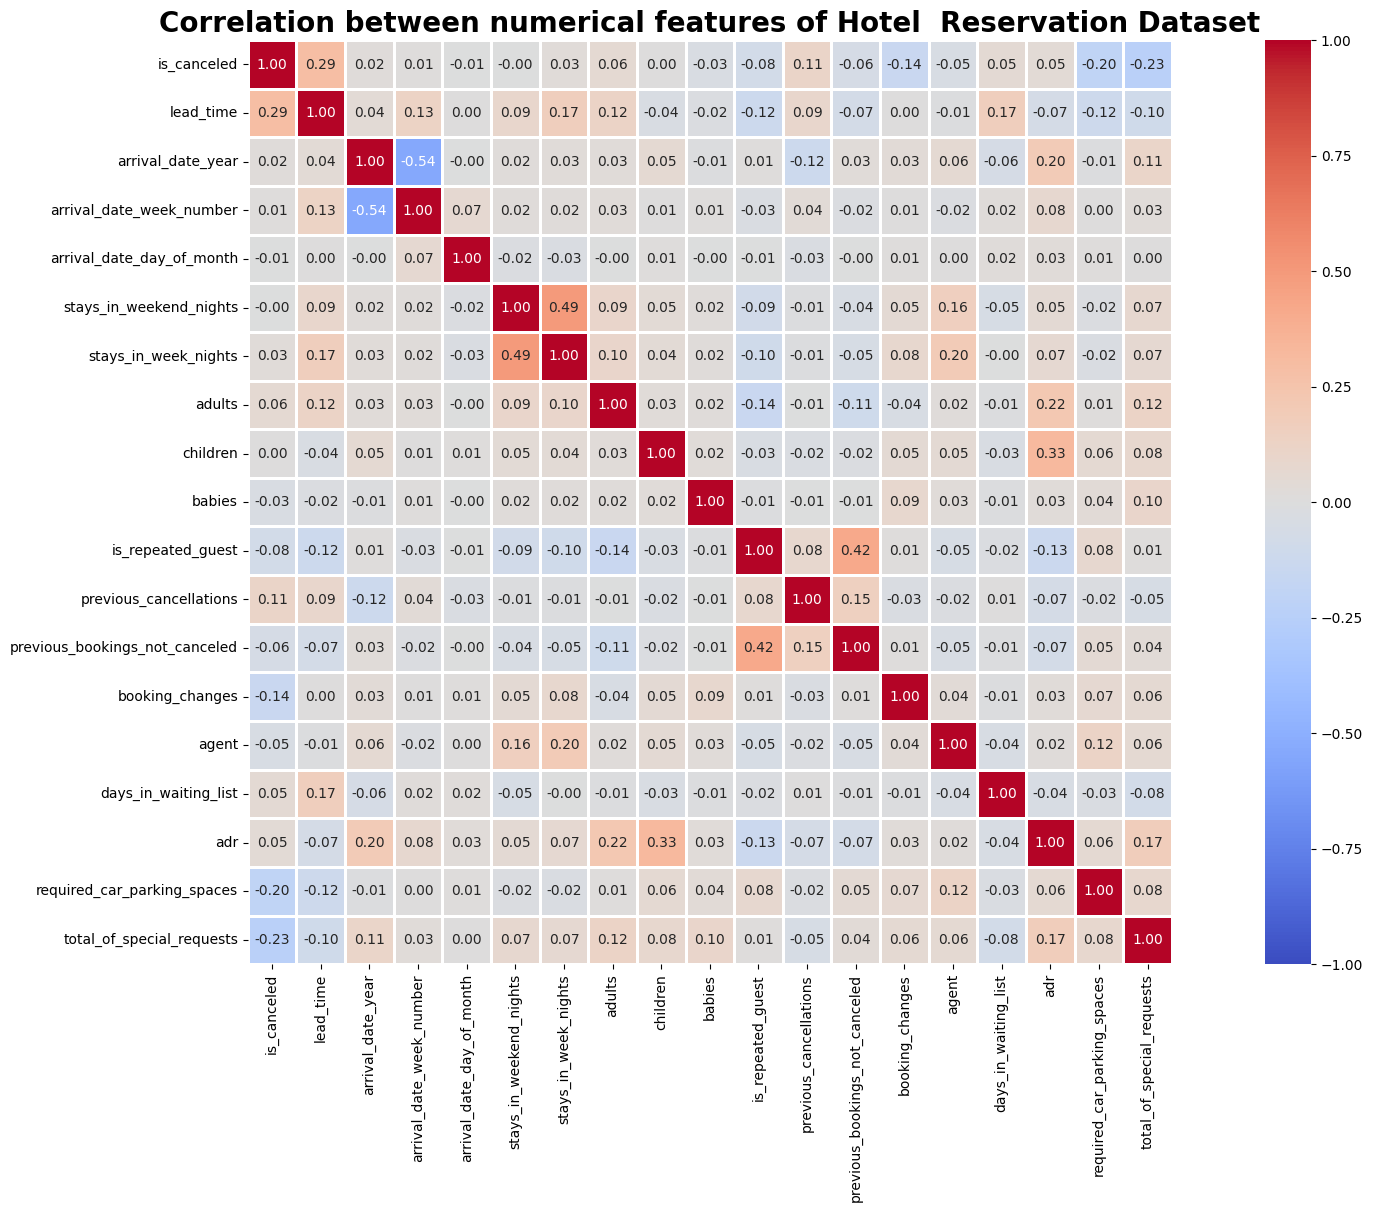

In [14]:
num_corr = df_num.corr()

plt.figure(figsize=(24, 12))
sns.heatmap(num_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", center= 0,
            square=True, linewidths=2)
plt.title('Correlation between numerical features of Hotel  Reservation Dataset', fontsize=20, fontweight='bold')
plt.show()

- Khi chúng ta xem xét ma trận tương quan của các biến phân loại, chúng ta có thể thấy rằng 'reservation-status' có tương quan rất cao (0,92) với 'is_canceled'
- Chúng ta có thể thấy rằng 'reservation-status' có thể dẫn đến rò rỉ dữ liệu, vì vậy chúng ta cần kiểm tra lại

In [15]:
inverse_encode_cat(df, encoders)

res_status_check_df = df.groupby('is_canceled')['reservation_status'].value_counts()
res_status_check_df


is_canceled  reservation_status
0            Check-Out             75011
1            Canceled              42991
             No-Show                1206
Name: count, dtype: int64

- Ta thấy khi "reservation_status" là "Check-Out" thì "is_canceled" là 1
- Ngược lại khi "reservation_status" là "Canceled" thì "is_canceled" là 0
- Từ các lập luận trên, ta có thể suy ra rằng việc đưa cột "reservation_status" vào sẽ gây rò rỉ dữ liệu
- Ta chọn bỏ các cột "reservation_status" và "reservation_status_date"
- Các cột "arrival_date_year", "assigned_room_type", "booking_changes" cũng có thể bỏ đi để tăng tính tổng quan của mô hình

In [16]:
df = df.drop(['reservation_status', 'reservation_status_date', 'arrival_date_year', 'assigned_room_type', 'booking_changes'], axis=1)
df

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,...,0,0,C,No Deposit,0.0,0,Transient,0.00,0,0
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,...,0,0,C,No Deposit,0.0,0,Transient,0.00,0,0
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,...,0,0,A,No Deposit,0.0,0,Transient,75.00,0,0
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,...,0,0,A,No Deposit,304.0,0,Transient,75.00,0,0
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,...,0,0,A,No Deposit,240.0,0,Transient,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,August,35,30,2,5,2,0.0,...,0,0,A,No Deposit,394.0,0,Transient,96.14,0,0
119386,City Hotel,0,102,August,35,31,2,5,3,0.0,...,0,0,E,No Deposit,9.0,0,Transient,225.43,0,2
119387,City Hotel,0,34,August,35,31,2,5,2,0.0,...,0,0,D,No Deposit,9.0,0,Transient,157.71,0,4
119388,City Hotel,0,109,August,35,31,2,5,2,0.0,...,0,0,A,No Deposit,89.0,0,Transient,104.40,0,0


# Mã hóa dữ liệu

In [17]:
cat_features = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type", "country"]

In [18]:
sc = MinMaxScaler()
num_features = [col for col in df.columns if col not in cat_features]
num_features.remove('is_canceled')
num_features.remove('is_repeated_guest')
df[num_features] = sc.fit_transform(df[num_features])
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,0.464043,July,0.5,0.0,0.0,0.00,0.036364,0.0,...,0.0,0.0,C,No Deposit,0.000000,0.0,Transient,0.001180,0.0,0.0
1,Resort Hotel,0,1.000000,July,0.5,0.0,0.0,0.00,0.036364,0.0,...,0.0,0.0,C,No Deposit,0.000000,0.0,Transient,0.001180,0.0,0.0
2,Resort Hotel,0,0.009498,July,0.5,0.0,0.0,0.02,0.018182,0.0,...,0.0,0.0,A,No Deposit,0.000000,0.0,Transient,0.015053,0.0,0.0
3,Resort Hotel,0,0.017639,July,0.5,0.0,0.0,0.02,0.018182,0.0,...,0.0,0.0,A,No Deposit,0.568224,0.0,Transient,0.015053,0.0,0.0
4,Resort Hotel,0,0.018996,July,0.5,0.0,0.0,0.04,0.036364,0.0,...,0.0,0.0,A,No Deposit,0.448598,0.0,Transient,0.019307,0.0,0.2


### 2. Mã hóa tính năng

Đầu tiên, chúng ta in giá trị duy nhất (unique value) của dữ liệu phân loại để xem loại mã hóa nào có thể được áp dụng cho từng loại.

In [19]:
df_cat.drop(columns=['is_canceled'], axis=1, inplace=True)
printUniqueValue(df_cat)

Number of unique values in hotel is 2
Number of unique values in arrival_date_month is 12
Number of unique values in meal is 4
Number of unique values in country is 178
Number of unique values in market_segment is 7
Number of unique values in distribution_channel is 5
Number of unique values in reserved_room_type is 9
Number of unique values in assigned_room_type is 11
Number of unique values in deposit_type is 3
Number of unique values in customer_type is 4
Number of unique values in reservation_status is 3


- Ta có thể thấy rằng đối với "country" có rất nhiều giá trị duy nhất, do đó ta có thể sử dụng BinaryEncoding
- Ta có thể sử dụng LabelEncoding cho các cột có 2 giá trị duy nhất như "hotel"
- Ta có thể sử dụng OneHotEncoder cho các cột còn lại

Chuyển đổi tất cả các cột danh mục thành kiểu dữ liệu danh mục

In [20]:
for feature in cat_features:
    df[feature] = df[feature].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119208 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           119208 non-null  category
 1   is_canceled                     119208 non-null  int64   
 2   lead_time                       119208 non-null  float64 
 3   arrival_date_month              119208 non-null  category
 4   arrival_date_week_number        119208 non-null  float64 
 5   arrival_date_day_of_month       119208 non-null  float64 
 6   stays_in_weekend_nights         119208 non-null  float64 
 7   stays_in_week_nights            119208 non-null  float64 
 8   adults                          119208 non-null  float64 
 9   children                        119208 non-null  float64 
 10  babies                          119208 non-null  float64 
 11  meal                            119208 non-null  category
 12  country

Đầu tiên, chúng tôi sử dụng Mã hóa nhãn

In [21]:
LabelEncoder = LabelEncoder()
df['hotel'] = LabelEncoder.fit_transform(df['hotel'])
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1,0,0.464043,July,0.5,0.0,0.0,0.00,0.036364,0.0,...,0.0,0.0,C,No Deposit,0.000000,0.0,Transient,0.001180,0.0,0.0
1,1,0,1.000000,July,0.5,0.0,0.0,0.00,0.036364,0.0,...,0.0,0.0,C,No Deposit,0.000000,0.0,Transient,0.001180,0.0,0.0
2,1,0,0.009498,July,0.5,0.0,0.0,0.02,0.018182,0.0,...,0.0,0.0,A,No Deposit,0.000000,0.0,Transient,0.015053,0.0,0.0
3,1,0,0.017639,July,0.5,0.0,0.0,0.02,0.018182,0.0,...,0.0,0.0,A,No Deposit,0.568224,0.0,Transient,0.015053,0.0,0.0
4,1,0,0.018996,July,0.5,0.0,0.0,0.04,0.036364,0.0,...,0.0,0.0,A,No Deposit,0.448598,0.0,Transient,0.019307,0.0,0.2


Một mã hóa nóng

In [22]:
OneHotFeatures = set(cat_features) - set(['hotel']) - set(['country'])
oneHotEncoded = pd.get_dummies(df, columns=list(OneHotFeatures), drop_first=True)
oneHotEncoded.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,distribution_channel_TA/TO,distribution_channel_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,deposit_type_Non Refund,deposit_type_Refundable
0,1,0,0.464043,0.5,0.0,0.0,0.00,0.036364,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
1,1,0,1.000000,0.5,0.0,0.0,0.00,0.036364,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
2,1,0,0.009498,0.5,0.0,0.0,0.02,0.018182,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
3,1,0,0.017639,0.5,0.0,0.0,0.02,0.018182,0.0,0.0,...,False,False,False,True,False,False,False,False,False,False
4,1,0,0.018996,0.5,0.0,0.0,0.04,0.036364,0.0,0.0,...,True,False,False,False,False,False,False,True,False,False


Mã hóa nhị phân

In [23]:
binary_encoder = ce.binary.BinaryEncoder()
binary_encoded_df = binary_encoder.fit_transform(df['country'])
binary_encoded_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 119208 entries, 0 to 119389
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   country_0  119208 non-null  int64
 1   country_1  119208 non-null  int64
 2   country_2  119208 non-null  int64
 3   country_3  119208 non-null  int64
 4   country_4  119208 non-null  int64
 5   country_5  119208 non-null  int64
 6   country_6  119208 non-null  int64
 7   country_7  119208 non-null  int64
dtypes: int64(8)
memory usage: 8.2 MB


In [24]:
binary_encoded_df.shape

(119208, 8)

Hợp nhất các cột được mã hóa với nhau

In [25]:
X = pd.concat([oneHotEncoded, binary_encoded_df], axis=1).drop('country', axis=1)
X.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,deposit_type_Non Refund,deposit_type_Refundable,country_0,country_1,country_2,country_3,country_4,country_5,country_6,country_7
0,1,0,0.464043,0.5,0.0,0.0,0.00,0.036364,0.0,0.0,...,False,False,0,0,0,0,0,0,0,1
1,1,0,1.000000,0.5,0.0,0.0,0.00,0.036364,0.0,0.0,...,False,False,0,0,0,0,0,0,0,1
2,1,0,0.009498,0.5,0.0,0.0,0.02,0.018182,0.0,0.0,...,False,False,0,0,0,0,0,0,1,0
3,1,0,0.017639,0.5,0.0,0.0,0.02,0.018182,0.0,0.0,...,False,False,0,0,0,0,0,0,1,0
4,1,0,0.018996,0.5,0.0,0.0,0.04,0.036364,0.0,0.0,...,False,False,0,0,0,0,0,0,1,0


xây dựng và đào tạo mô hình

In [26]:
y = X['is_canceled']
X = X.drop('is_canceled', axis=1)

y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

In [27]:
print('Shape of features', X.shape)
print('Shape of target', y.shape)

Shape of features (119208, 62)
Shape of target (119208,)


# Xây dựng, đào tạo và đánh giá mô hình

Trong phần này chúng ta sẽ xây dựng các mô hình sau:
- Hồi quy logistic
- MLP ()
- Cây quyết định
- Gaussian Naive Bayes
- Rừng ngẫu nhiên
- Bộ phân loại XGBoost

## 1. Chia thành tập huấn luyện và tập kiểm tra

- Hàm train_test_split sẽ chia tập dữ liệu thành hai phần: Train set, test set
- Train set sẽ chiếm 80% tổng số phần và test set sẽ chiếm 20% phần. Random_state=42 được bao gồm để đảm bảo giá trị continuos không ảnh hưởng đến dữ liệu.
- Mỗi tập sẽ có các tính năng và một biến mục tiêu được đặt tên tương ứng là "X" và "y"

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Shape of train set', X_train.shape, y_train.shape)
print('Shape of test set', X_test.shape, y_test.shape)

Shape of train set (95366, 62) (95366,)
Shape of test set (23842, 62) (23842,)


In [29]:
acc = dict()
f1 = dict()
recall = dict()
precision = dict()
fpr = dict()
tpr = dict()

## 2. Logistic Regression

#### 2.1. Xây dựng và đào tạo mô hình

In [30]:
lg = LogisticRegression()

Các tham số hồi quy logistic được điều chỉnh: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [31]:
best_params = {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
LG_best = LogisticRegression(**best_params)
LG_best.fit(X_train, y_train)

acc['Logistic Regression'] = LG_best.score(X_test, y_test)
print(f"Tuned LG model Test set accuracy: {acc['Logistic Regression']}")

Tuned LG model Test set accuracy: 0.8066437379414478


Phù hợp với mô hình cơ sở để so sánh với mô hình đã điều chỉnh

In [32]:
lg.fit(X_train, y_train)
print("Base LG model Test set accuracy:", lg.score(X_test, y_test))

Base LG model Test set accuracy: 0.796409697173056


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ma trận nhầm lẫn - Hồi quy logistic

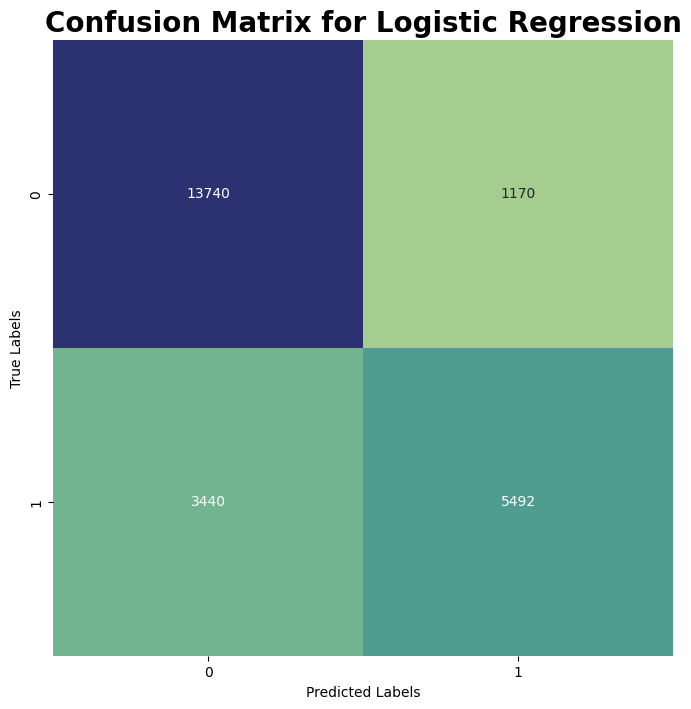

In [33]:
y_lg_pred = LG_best.predict(X_test)
lg_confmat = confusion_matrix(y_test, y_lg_pred)

fig = plt.figure(figsize=(8, 8))
sns.heatmap(lg_confmat, annot=True, cmap='crest', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression', fontsize=20, fontweight='bold')
plt.show()

#### 2.2. Đánh giá mô hình

In [36]:
print(classification_report(y_test, y_lg_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86     14910
           1       0.82      0.61      0.70      8932

    accuracy                           0.81     23842
   macro avg       0.81      0.77      0.78     23842
weighted avg       0.81      0.81      0.80     23842

